# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  31.3M      0  0:00:02  0:00:02 --:--:-- 31.3M
total 992
-rw-rw-r-- 1 tom tom 946269 juin  30 17:30 image_denoising.ipynb
drwx------ 2 tom tom  61440 juin   9 15:06 paintings
-rw-rw-r-- 1 tom tom      0 juin  29 09:17 README.md
drwxrwxr-x 2 tom tom   4096 juin  30 17:30 tests


In [2]:
import glob

dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/El_Greco_63.jpg',
 './paintings/Kazimir_Malevich_13.jpg',
 './paintings/Vincent_van_Gogh_99.jpg',
 './paintings/Andy_Warhol_159.jpg',
 './paintings/Pieter_Bruegel_12.jpg',
 './paintings/Kazimir_Malevich_4.jpg',
 './paintings/Francisco_Goya_205.jpg',
 './paintings/Albrecht_DuÌ\x88rer_150.jpg',
 './paintings/Pablo_Picasso_351.jpg',
 './paintings/Joan_Miro_11.jpg',
 './paintings/Alfred_Sisley_82.jpg',
 './paintings/Vincent_van_Gogh_514.jpg',
 './paintings/Raphael_58.jpg',
 './paintings/Joan_Miro_48.jpg',
 './paintings/El_Greco_78.jpg',
 './paintings/Vincent_van_Gogh_204.jpg',
 './paintings/Marc_Chagall_2.jpg',
 './paintings/Paul_Klee_152.jpg',
 './paintings/Rembrandt_217.jpg',
 './paintings/Albrecht_DuÌ\x88rer_158.jpg',
 './paintings/Gustave_Courbet_53.jpg',
 './paintings/Henri_Matisse_46.jpg',
 './paintings/Edgar_Degas_60.jpg',
 './paintings/Albrecht_DuÌ\x88rer_215.jpg',
 './paintings/Paul_Gauguin_180.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Camille_Pissar

In [3]:
dataset_paths[53]

'./paintings/Henri_Rousseau_36.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

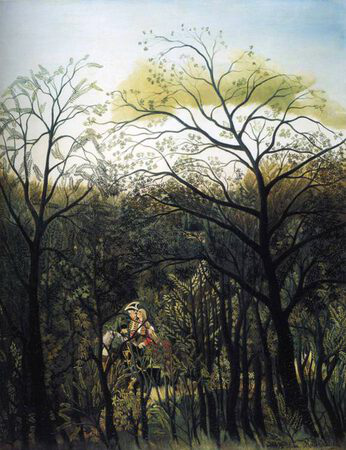

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_53 = Image.open('./paintings/Henri_Rousseau_36.jpg', mode='r')
img_53

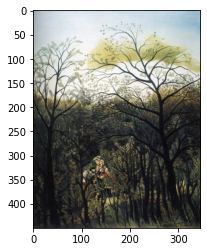

In [5]:
img_53 = plt.imshow(img_53)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [6]:
img_53 = cv.imread('./paintings/Henri_Rousseau_36.jpg')

In [7]:
# YOUR CODE HERE
img_shape = img_53.shape
img_shape

(450, 346, 3)

In [8]:
img_dim = img_53.size
img_dim

467100

❓ **What was in the image above?**

In [9]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [10]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [11]:
# YOUR CODE HERE
dataset_images = []
for i in dataset_paths:
    dataset_images.append(cv.imread(i))

In [12]:
len(dataset_images)

1085

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [13]:
# YOUR CODE HERE
for i in dataset_images:
    print(i.size)
    print(i.shape)

425436
(293, 484, 3)
305640
(360, 283, 3)
1385184
(752, 614, 3)
217728
(288, 252, 3)
1389312
(603, 768, 3)
541800
(600, 301, 3)
699960
(614, 380, 3)
3104454
(842, 1229, 3)
466464
(452, 344, 3)
182250
(270, 225, 3)
1520208
(648, 782, 3)
1372290
(614, 745, 3)
734958
(614, 399, 3)
466116
(358, 434, 3)
378972
(484, 261, 3)
1202688
(522, 768, 3)
550434
(461, 398, 3)
504000
(350, 480, 3)
852846
(463, 614, 3)
3133950
(1229, 850, 3)
308880
(286, 360, 3)
419838
(419, 334, 3)
1010568
(632, 533, 3)
2374428
(1229, 644, 3)
766428
(578, 442, 3)
849162
(461, 614, 3)
915474
(614, 497, 3)
576444
(484, 397, 3)
852846
(463, 614, 3)
592410
(403, 490, 3)
930210
(614, 505, 3)
1016496
(724, 468, 3)
1188000
(825, 480, 3)
435741
(431, 337, 3)
403848
(426, 316, 3)
873000
(600, 485, 3)
398160
(420, 316, 3)
2791059
(1229, 757, 3)
797586
(614, 433, 3)
736878
(643, 382, 3)
836493
(653, 427, 3)
722064
(614, 392, 3)
242784
(281, 288, 3)
2232000
(960, 775, 3)
577896
(484, 398, 3)
679680
(480, 472, 3)
525600
(365, 480,

all images are a different shape and dimension

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [14]:
from tqdm import tqdm

dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 3252909.11it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [15]:
from tensorflow.image import resize

dataset_resized = []

for i in dataset_images:
    dataset_resized.append(resize(i, [120,100]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


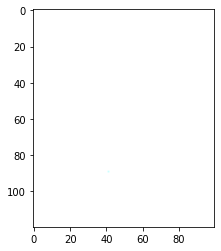

In [16]:
plt.imshow(dataset_resized[53])

In [17]:
# from skimage.transform import resize

# dataset_resized = []

# for i in dataset_images:
#     dataset_resized.append(resize(i, [120,100]))

In [18]:
# plt.imshow(dataset_resized[53])

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_scaled = []

for i in dataset_resized[0]:
    dataset_scaled.append(scaler.fit_transform(i))

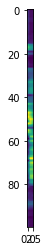

In [20]:
plt.imshow(dataset_scaled[53])

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [21]:
# NOISE_LEVEL = 0.2

# dataset_noisy = np.clip(
#     dataset_scaled + np.random.normal(
#         loc=0,
#         scale=NOISE_LEVEL,
#         size=dataset_scaled.shape
#     ).astype(np.float32),
#     0,
#     1
# )
# dataset_noisy.shape

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

In [22]:
# dataset_noisy

In [23]:
# plt.imshow(dataset_noisy)

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [24]:
# X = dataset_scaled
# y = dataset_noisy

In [25]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
# from nbresult import ChallengeResult
# result = ChallengeResult(
#     "preprocessing",
#     X_train_shape = X_train.shape,
#     Y_train_shape = Y_train.shape,
#     X_std = X_train[:,:,:,0].std(),
#     Y_std = Y_train[:,:,:,0].std(),
#     first_image = Y_train[0]
# )
# result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [27]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)

! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0  32.3M      0  0:00:09  0:00:09 --:--:-- 34.8M


### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [29]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [30]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


encoder = Sequential()

encoder.add(Conv2D(8, (2,2), input_shape=(120, 100, 3), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(16, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(32, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))     

encoder.add(Flatten())
encoder.add(Dense(6000, activation='tanh'))

In [31]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 119, 99, 8)        104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 48, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 23, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0

👉 **Test your encoder below**

In [32]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 6000)              29576712  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 29,583,387
Trainable params: 29,583,387
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [33]:
score_baseline = 0.5

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [34]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse',
                  optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=4, restore_best_weights=True)
compile_autoencoder(autoencoder)
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.3, callbacks=[es])

Epoch 1/10
19/19 [==============================] - 11s 549ms/step - loss: 0.0946 - val_loss: 0.0930
Epoch 2/10
19/19 [==============================] - 10s 528ms/step - loss: 0.0912 - val_loss: 0.0886
Epoch 3/10
19/19 [==============================] - 10s 527ms/step - loss: 0.0839 - val_loss: 0.0772
Epoch 4/10
19/19 [==============================] - 10s 504ms/step - loss: 0.0754 - val_loss: 0.0718
Epoch 5/10
19/19 [==============================] - 10s 522ms/step - loss: 0.0707 - val_loss: 0.0686
Epoch 6/10
19/19 [==============================] - 9s 484ms/step - loss: 0.0669 - val_loss: 0.0652
Epoch 7/10
19/19 [==============================] - 9s 489ms/step - loss: 0.0633 - val_loss: 0.0625
Epoch 8/10
19/19 [==============================] - 9s 496ms/step - loss: 0.0599 - val_loss: 0.0592
Epoch 9/10
19/19 [==============================] - 9s 500ms/step - loss: 0.0569 - val_loss: 0.0571
Epoch 10/10
19/19 [==============================] - 10s 498ms/step - loss: 0.0542 - val_loss: 

❓ **Plot your training and validation loss at each epoch using the cell below**

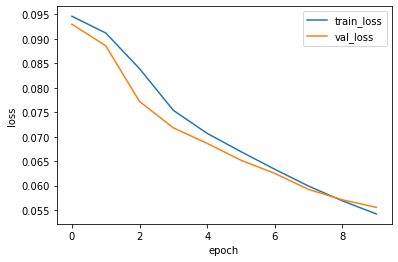

In [36]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [37]:
Y_pred = autoencoder.predict(X_test)

In [38]:
score_test = autoencoder.evaluate(X_train, Y_train)

28/28 [==============================] - 2s 85ms/step - loss: 0.0286


In [39]:
score_test

0.02863219939172268

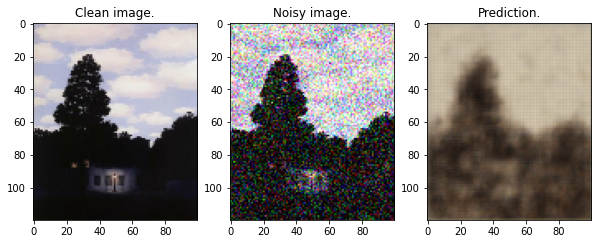

In [40]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()